In [1]:
import numpy as np
import tensorflow
import time
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
X_full= np.load("./data/X_full.npy", allow_pickle= True)
y_full= np.load("./data/y_full_ind.npy", allow_pickle= True)

In [3]:
X_full.shape

(18900, 19)

In [4]:
y_full.shape

(18900, 1)

In [5]:
X_train_all, X_test, y_train_all, y_test= train_test_split(X_full, y_full, train_size= 0.7, random_state= 42)

In [6]:
X_train, X_val, y_train, y_val= train_test_split(X_train_all, y_train_all, train_size= 0.9, random_state= 42)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(11907, 19)
(5670, 19)
(1323, 19)
(11907, 1)
(5670, 1)
(1323, 1)


In [8]:
model= keras.models.Sequential()

In [9]:
model.add(keras.layers.Dense(19, input_dim= 19, activation= "relu"))
model.add(keras.layers.Dense(32, activation= "relu"))
model.add(keras.layers.Dense(64, activation= "relu"))
model.add(keras.layers.Dense(128, activation= "relu"))
model.add(keras.layers.Dense(256, activation= "relu"))
model.add(keras.layers.Dense(512, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1024, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2048, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4096, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(8192, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4096, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2048, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1024, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation= "relu"))
model.add(keras.layers.Dense(128, activation= "relu"))
model.add(keras.layers.Dense(64, activation= "relu"))
model.add(keras.layers.Dense(63, activation= "softmax"))

In [10]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer= "sgd", metrics= ["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [12]:
start_time= time.time()
history= model.fit(X_train, y_train, epochs= 400, validation_data= (X_val, y_val))
end_time= time.time()

h= (end_time-start_time)//60//60
m= (end_time-start_time)%60
print("time: ", h, "h ", m, "m (", (end_time-start_time),"s)")

Epoch 1/400
373/373 [==============================] - 83s 222ms/step - loss: 4.1547 - accuracy: 0.0150 - val_loss: 4.1432 - val_accuracy: 0.0106
Epoch 2/400
373/373 [==============================] - 83s 223ms/step - loss: 4.1440 - accuracy: 0.0151 - val_loss: 4.1432 - val_accuracy: 0.0136
Epoch 3/400
373/373 [==============================] - 84s 224ms/step - loss: 4.1421 - accuracy: 0.0149 - val_loss: 4.1432 - val_accuracy: 0.0128
Epoch 4/400
373/373 [==============================] - 84s 224ms/step - loss: 4.1411 - accuracy: 0.0170 - val_loss: 4.1434 - val_accuracy: 0.0136
Epoch 5/400
373/373 [==============================] - 84s 224ms/step - loss: 4.1396 - accuracy: 0.0167 - val_loss: 4.1433 - val_accuracy: 0.0121
Epoch 6/400
373/373 [==============================] - 84s 224ms/step - loss: 4.1389 - accuracy: 0.0155 - val_loss: 4.1434 - val_accuracy: 0.0159
Epoch 7/400
373/373 [==============================] - 84s 225ms/step - loss: 4.1348 - accuracy: 0.0181 - val_loss: 4.1435 -

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

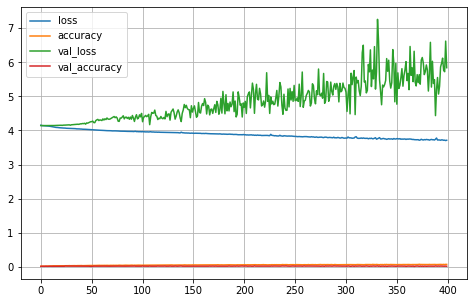

In [16]:
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.show()

In [13]:
model.save("./model/NN_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model/NN_model\assets


In [30]:
y_pred= model.predict(X_test)

y_hat= []

for i in y_pred:
    y_hat.append(np.argmax(i))

In [32]:
y_test

array([[54],
       [23],
       [42],
       ...,
       [61],
       [36],
       [50]])

In [33]:
accuracy= 0

for i in range(len(y_test)):
    if(y_test[i]== y_hat[i]):
        accuracy+= 1

print("accuracy: ", accuracy/len(y_test))

accuracy:  0.014991181657848324
